In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999 

In [6]:
###creating a dataframe 
df=pd.read_csv('data.csv')
df.head()

Id State  Account length  Area code International plan Voice mail plan  \
0  CUST-1    KS             128        415                 No             Yes   
1  CUST-2    OH             107        415                 No             Yes   
2  CUST-3    NJ             137        415                 No              No   
3  CUST-4    OH              84        408                Yes              No   
4  CUST-5    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [7]:
df.shape ###shape of the dataset

(3333, 21)

In [8]:
df.info()   ###full information abt the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      3333 non-null   object 
 1   State                   3333 non-null   object 
 2   Account length          3333 non-null   int64  
 3   Area code               3333 non-null   int64  
 4   International plan      3333 non-null   object 
 5   Voice mail plan         3333 non-null   object 
 6   Number vmail messages   3333 non-null   int64  
 7   Total day minutes       3333 non-null   float64
 8   Total day calls         3333 non-null   int64  
 9   Total day charge        3333 non-null   float64
 10  Total eve minutes       3333 non-null   float64
 11  Total eve calls         3333 non-null   int64  
 12  Total eve charge        3333 non-null   float64
 13  Total night minutes     3333 non-null   float64
 14  Total night calls       3333 non-null   

## Eda

In [9]:
df['Churn']=np.where(df['Churn']==False,0,1) ##Churn column is the target column so changed the data type from bool to int

In [10]:
df['Churn'].dtypes

dtype('int32')

In [11]:
###Statistical analysis of df (numerical columns)
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls        Churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

In [12]:
df.isnull().sum()###No null values are present in the dataset

Id                        0
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [13]:
for feature in df.columns:
    print(feature,'-->no of unique values-->',df[feature].nunique())

Id -->no of unique values--> 3333
State -->no of unique values--> 51
Account length -->no of unique values--> 212
Area code -->no of unique values--> 3
International plan -->no of unique values--> 2
Voice mail plan -->no of unique values--> 2
Number vmail messages -->no of unique values--> 46
Total day minutes -->no of unique values--> 1667
Total day calls -->no of unique values--> 119
Total day charge -->no of unique values--> 1667
Total eve minutes -->no of unique values--> 1611
Total eve calls -->no of unique values--> 123
Total eve charge -->no of unique values--> 1440
Total night minutes -->no of unique values--> 1591
Total night calls -->no of unique values--> 120
Total night charge -->no of unique values--> 933
Total intl minutes -->no of unique values--> 162
Total intl calls -->no of unique values--> 21
Total intl charge -->no of unique values--> 162
Customer service calls -->no of unique values--> 10
Churn -->no of unique values--> 2


#### Numerical features

In [14]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
numerical_features

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

#### Categorical features

In [15]:
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['Id', 'State', 'International plan', 'Voice mail plan']

In [16]:
df[categorical_features]

Id State International plan Voice mail plan
0        CUST-1    KS                 No             Yes
1        CUST-2    OH                 No             Yes
2        CUST-3    NJ                 No              No
3        CUST-4    OH                Yes              No
4        CUST-5    OK                Yes              No
...         ...   ...                ...             ...
3328  CUST-3329    AZ                 No             Yes
3329  CUST-3330    WV                 No              No
3330  CUST-3331    RI                 No              No
3331  CUST-3332    CT                Yes              No
3332  CUST-3333    TN                 No             Yes

[3333 rows x 4 columns]

In [17]:
df['Customer service calls'].unique() ##ordinal feature

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8], dtype=int64)

In [18]:
### The following settings will improve the default style and font sizes for our charts.
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [19]:
plt.rcParams['figure.figsize']=(10,4)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


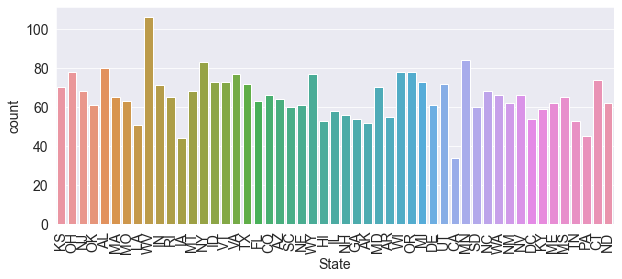

In [20]:
##Visualisation of state column
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


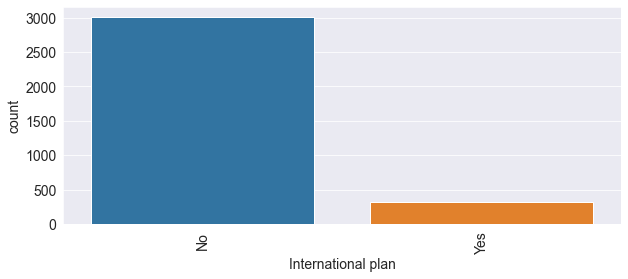

In [21]:
##Visualisation of International plan column
sns.countplot(df['International plan'])
plt.xticks(rotation=90)
plt.show()

##### Looks like most of the people dont take the international plan

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


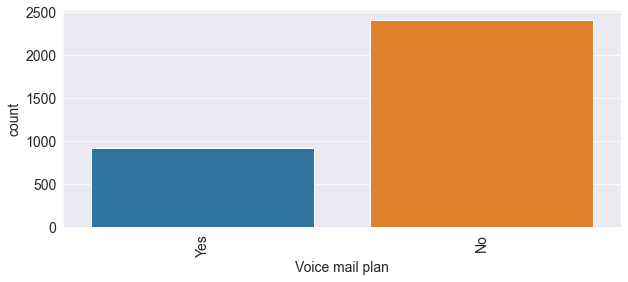

In [22]:
##Visualisation of International plan column
sns.countplot(df['Voice mail plan'])
plt.xticks(rotation=90)
plt.show()

##### Very less people have taken the voice mail plan

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


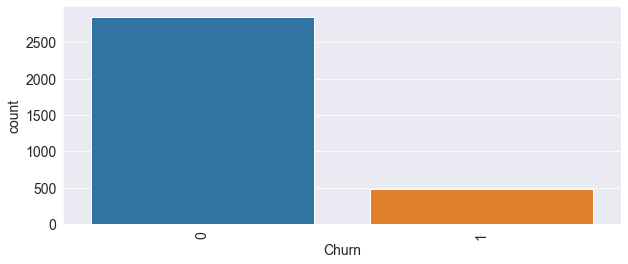

In [23]:
##Visualisation of churn column
sns.countplot(df['Churn'])
plt.xticks(rotation=90)
plt.show()

In [24]:
df['Churn'].value_counts(normalize=True)  ####It is a imbalanced dataset

0    0.855086
1    0.144914
Name: Churn, dtype: float64

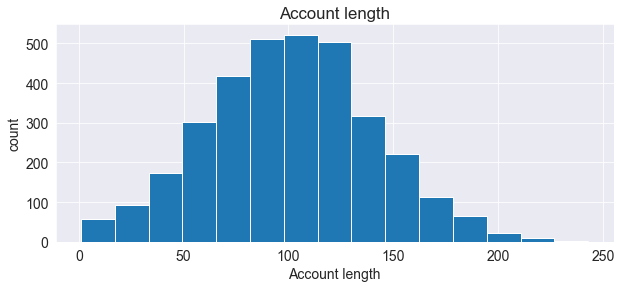

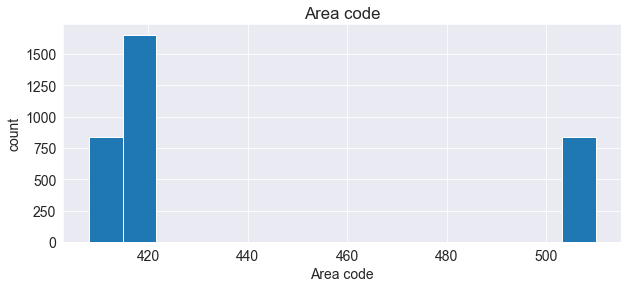

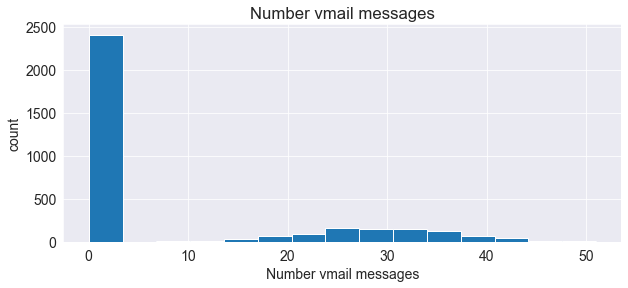

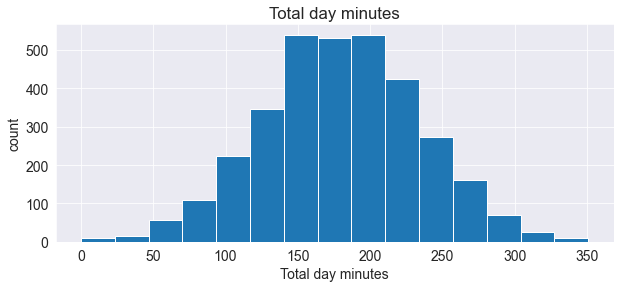

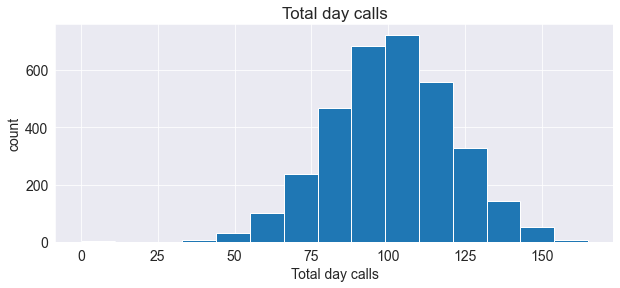

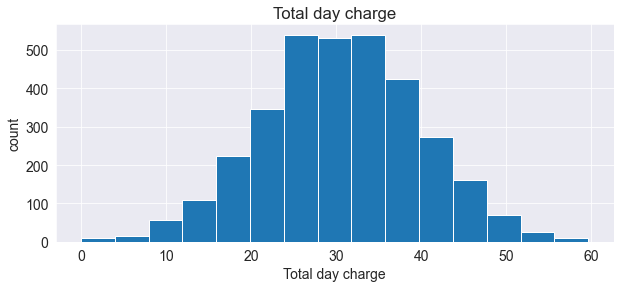

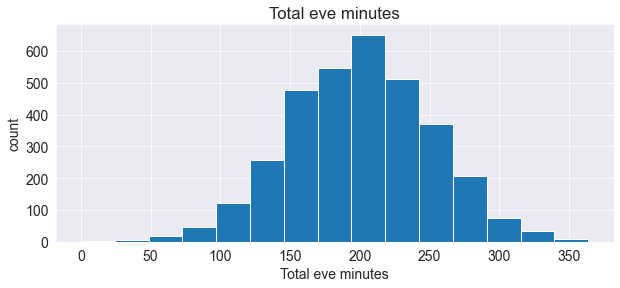

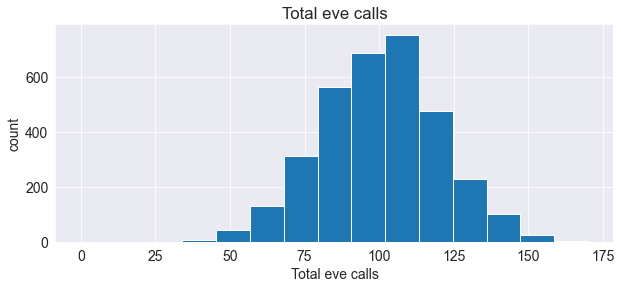

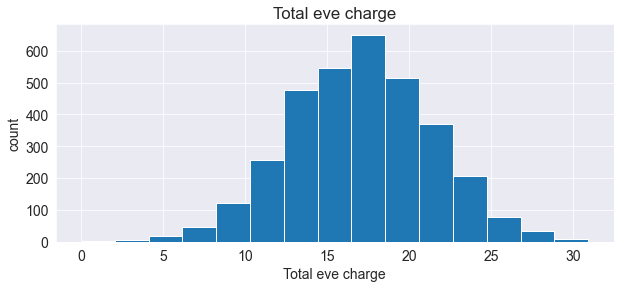

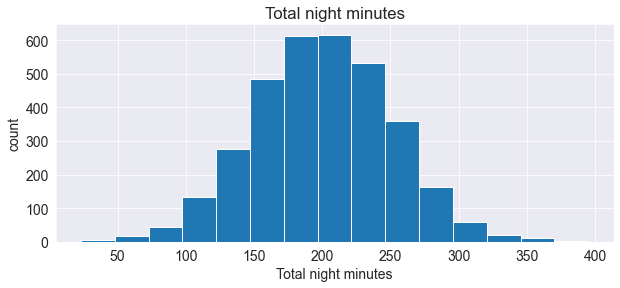

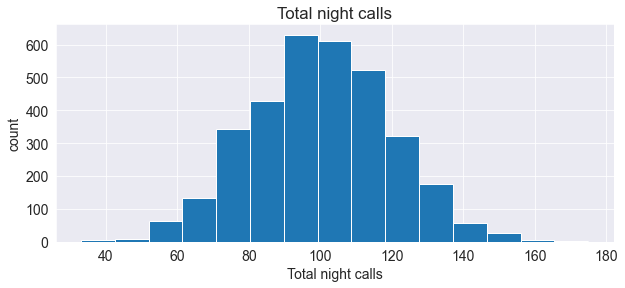

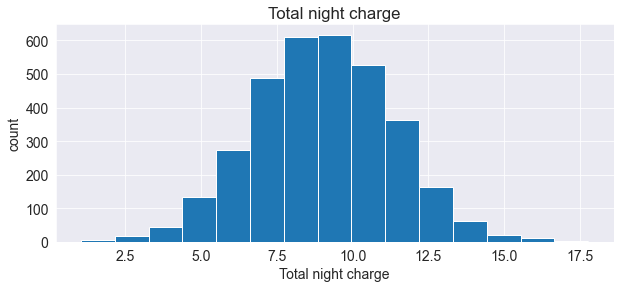

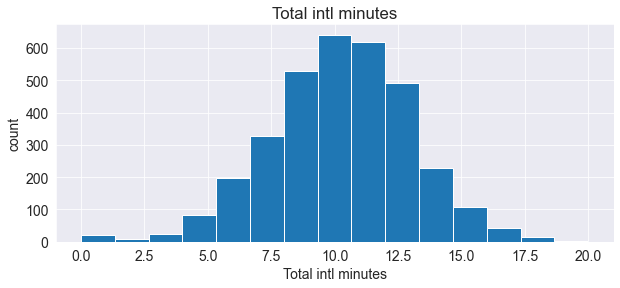

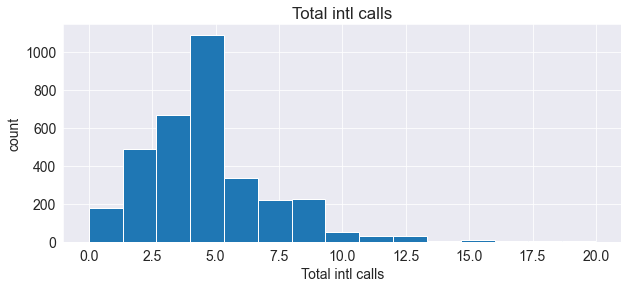

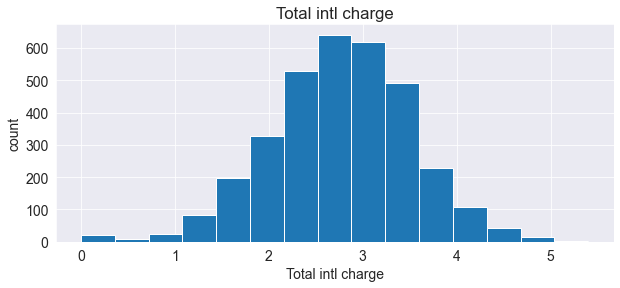

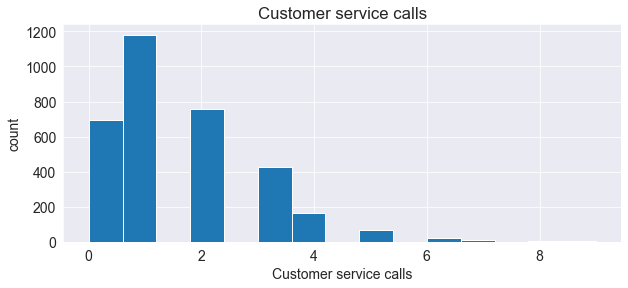

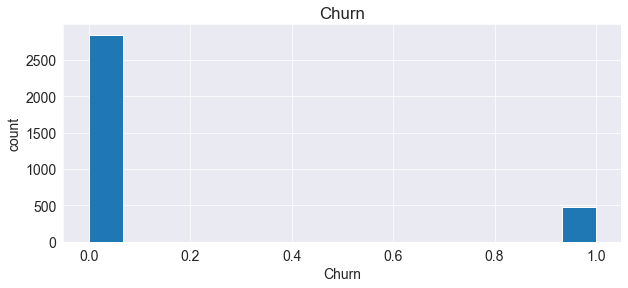

In [25]:
#lets analyse the numerical features by plotting histograms 

for feature in numerical_features:
    data=df.copy()
    data[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [26]:
for feature in df.columns:
    print(feature,'-->no of unique values-->',df[feature].nunique())

Id -->no of unique values--> 3333
State -->no of unique values--> 51
Account length -->no of unique values--> 212
Area code -->no of unique values--> 3
International plan -->no of unique values--> 2
Voice mail plan -->no of unique values--> 2
Number vmail messages -->no of unique values--> 46
Total day minutes -->no of unique values--> 1667
Total day calls -->no of unique values--> 119
Total day charge -->no of unique values--> 1667
Total eve minutes -->no of unique values--> 1611
Total eve calls -->no of unique values--> 123
Total eve charge -->no of unique values--> 1440
Total night minutes -->no of unique values--> 1591
Total night calls -->no of unique values--> 120
Total night charge -->no of unique values--> 933
Total intl minutes -->no of unique values--> 162
Total intl calls -->no of unique values--> 21
Total intl charge -->no of unique values--> 162
Customer service calls -->no of unique values--> 10
Churn -->no of unique values--> 2


In [27]:
numerical_features

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

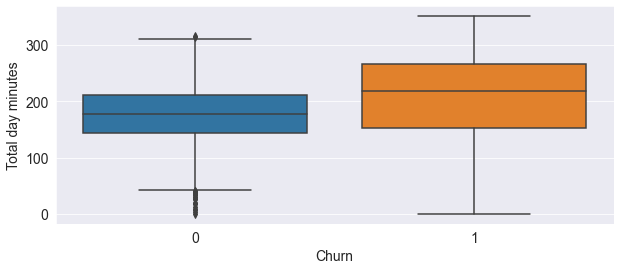

In [28]:
# Plot boxplot of `Total day minutes` for all category in `Churn`
sns.boxplot(x="Churn", y="Total day minutes", data=df);
plt.show()

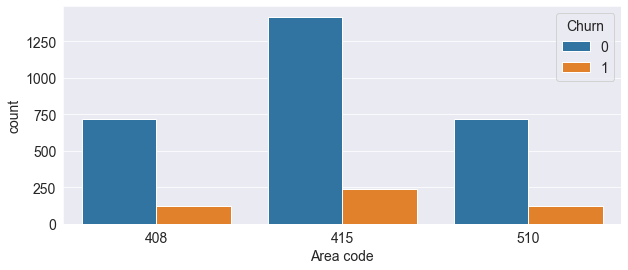

In [29]:
###Plot for area code column
sns.countplot(x="Area code", hue="Churn", data=df);
plt.show()

In [30]:
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

##### Getting more churns from area 415.May be because it is a bigger area and more customers are present there.So we have to target that customers more

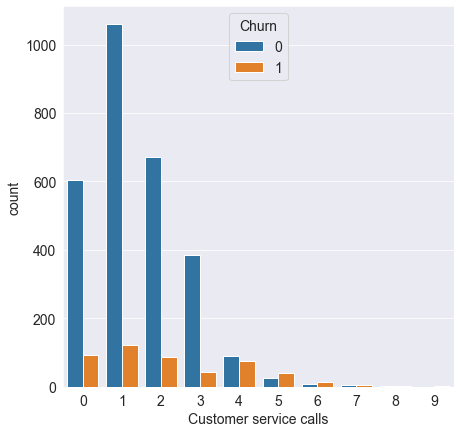

In [31]:
# Customer service call columns
plt.figure(figsize=(7,7))

sns.countplot(x="Customer service calls", hue="Churn", data=df);

In [32]:
df.groupby('Churn')['Customer service calls'].median()

Churn
0    1.0
1    2.0
Name: Customer service calls, dtype: float64

#### Customers who churned made twice as much Customer service calls than those who didn't churn

In [33]:
df.head()

Id State  Account length  Area code International plan Voice mail plan  \
0  CUST-1    KS             128        415                 No             Yes   
1  CUST-2    OH             107        415                 No             Yes   
2  CUST-3    NJ             137        415                 No              No   
3  CUST-4    OH              84        408                Yes              No   
4  CUST-5    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

### Relationship of all features and Median Value comparision with Churn column

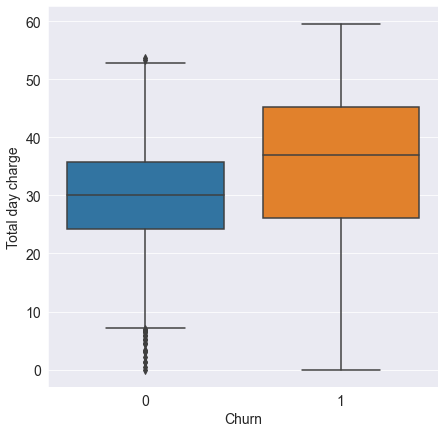

In [34]:
# Customer service call columns
plt.figure(figsize=(7,7))

sns.boxplot(y="Total day charge",x="Churn", data=df)
plt.show()

In [35]:
df.groupby('Churn')['Total day charge'].median()

Churn
0    30.12
1    36.99
Name: Total day charge, dtype: float64

#### Customers who have churned have paid more Total Day Charge

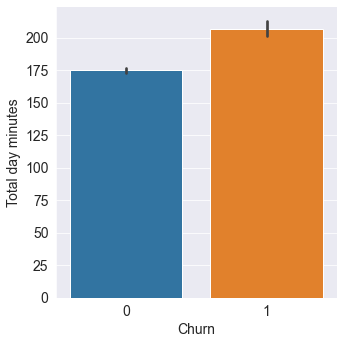

In [36]:
### lets check relationship between total day minutes and churn  column
sns.catplot(x='Churn',y='Total day minutes',data=df,kind='bar')
plt.show()

In [37]:
df.groupby('Churn')['Total day minutes'].median()

Churn
0    177.2
1    217.6
Name: Total day minutes, dtype: float64

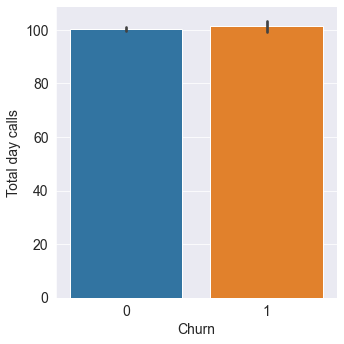

In [38]:
### lets check relationship between total day calls and churn  column
sns.catplot(x='Churn',y='Total day calls',data=df,kind='bar')
plt.show()

In [39]:
df.groupby('Churn')['Total day calls'].median()

Churn
0    100.0
1    103.0
Name: Total day calls, dtype: float64

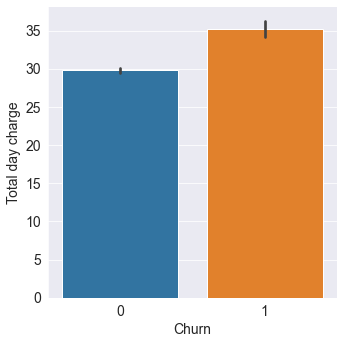

In [40]:
### lets check relationship between total day charges and churn  column
sns.catplot(x='Churn',y='Total day charge',data=df,kind='bar')
plt.show()

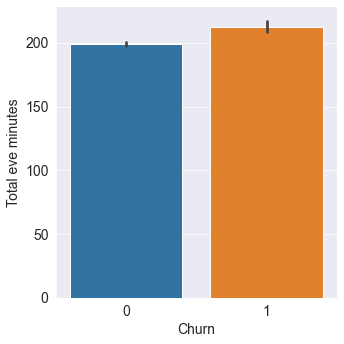

In [41]:
### lets check relationship between total eve minutes and churn  column
sns.catplot(x='Churn',y='Total eve minutes',data=df,kind='bar')
plt.show()

In [42]:
df.groupby('Churn')['Total eve minutes'].median()

Churn
0    199.6
1    211.3
Name: Total eve minutes, dtype: float64

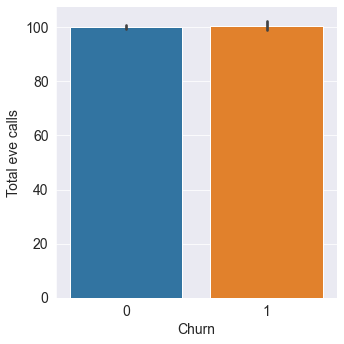

In [43]:
### lets check relationship between total eve calls and churn  column
sns.catplot(x='Churn',y='Total eve calls',data=df,kind='bar')
plt.show()

In [44]:
df.groupby('Churn')['Total eve calls'].median()

Churn
0    100.0
1    101.0
Name: Total eve calls, dtype: float64

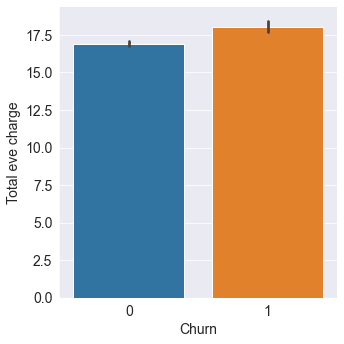

In [45]:
### lets check relationship between total eve charge and churn  column
sns.catplot(x='Churn',y='Total eve charge',data=df,kind='bar')
plt.show()

In [46]:
df.groupby('Churn')['Total eve charge'].median()

Churn
0    16.97
1    17.96
Name: Total eve charge, dtype: float64

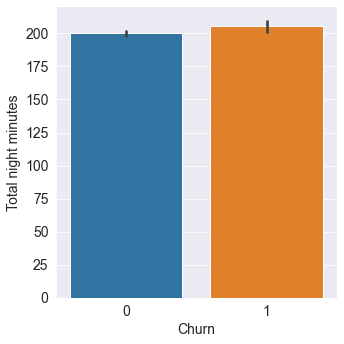

In [47]:
### lets check relationship between total night charge and churn  column
sns.catplot(x='Churn',y='Total night minutes',data=df,kind='bar')
plt.show()

In [48]:
df.groupby('Churn')['Total night minutes'].median()

Churn
0    200.25
1    204.80
Name: Total night minutes, dtype: float64

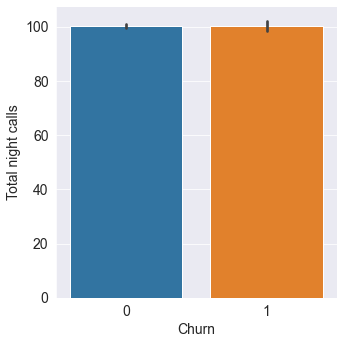

In [49]:
### lets check relationship between total night minutes and churn  column
sns.catplot(x='Churn',y='Total night calls',data=df,kind='bar')
plt.show()

In [50]:
df.groupby('Churn')['Total night calls'].median()

Churn
0    100.0
1    100.0
Name: Total night calls, dtype: float64

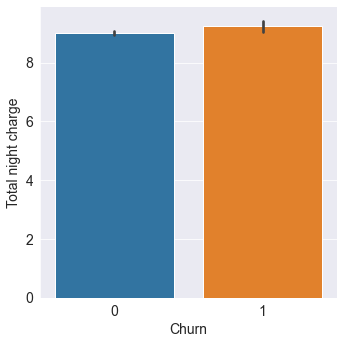

In [51]:
### lets check relationship between total night minutes and churn  column
sns.catplot(x='Churn',y='Total night charge',data=df,kind='bar')
plt.show()

In [52]:
df.groupby('Churn')['Total night charge'].median()

Churn
0    9.01
1    9.22
Name: Total night charge, dtype: float64

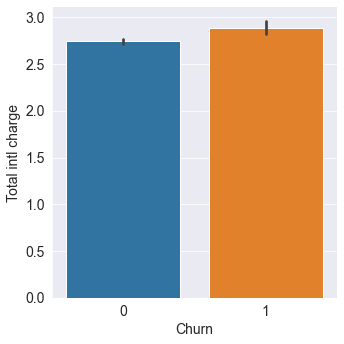

In [53]:
### lets check relationship between total night minutes and churn  column
sns.catplot(x='Churn',y='Total intl charge',data=df,kind='bar')
plt.show()

In [54]:
df.groupby('Churn')['Total intl charge'].median()

Churn
0    2.75
1    2.86
Name: Total intl charge, dtype: float64

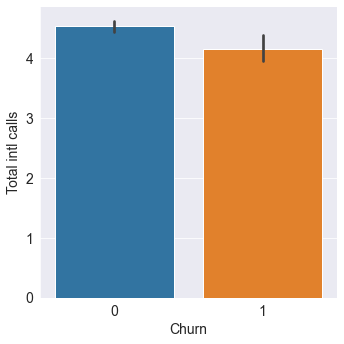

In [55]:
### lets check relationship between total night minutes and churn  column
sns.catplot(x='Churn',y='Total intl calls',data=df,kind='bar')
plt.show()

#### Customers who churned made less international calls

#### minutes and charge columns are possibly strongly correlated

In [56]:
df.groupby('Churn')['Total intl calls'].median()

Churn
0    4.0
1    4.0
Name: Total intl calls, dtype: float64

### Correlation matrix

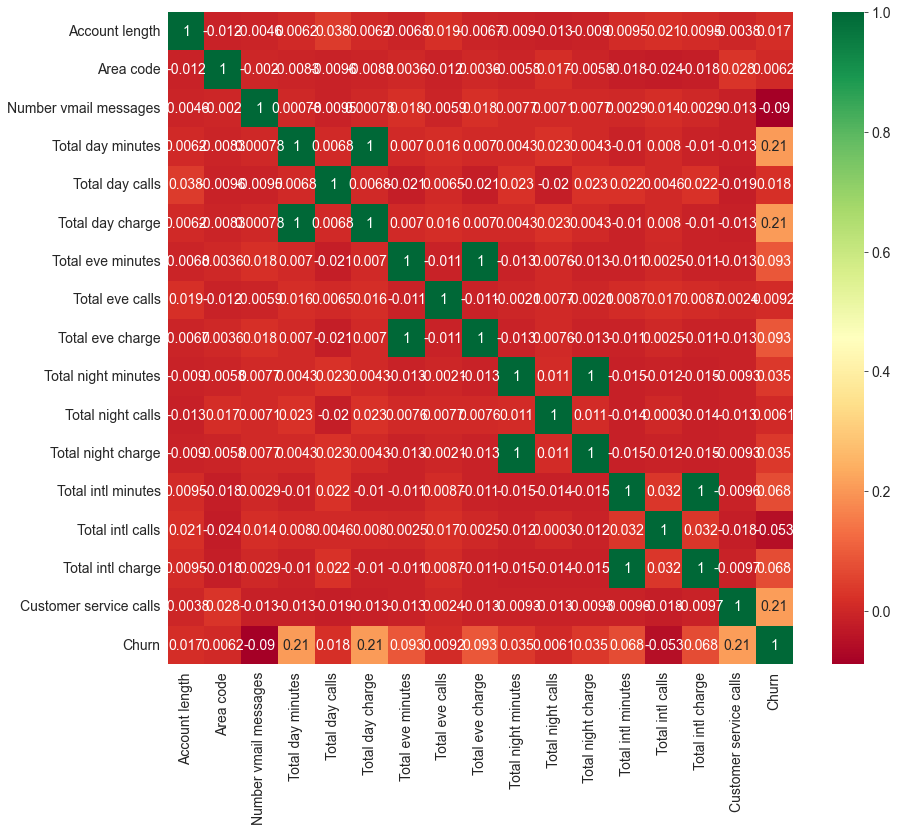

In [57]:
## Only numerical columns
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()


#### Call minutes and Call Charge are strongly correlated with a correlation factor of 1.


#### Several of the numerical data are very correlated. (Total day minutes and Total day charge), (Total eve minutes and Total eve charge), (Total night minutes and Total night charge) and lastly (Total intl minutes and Total intl charge) are alo correlated. We only have to select one of them.

### Pairplot

<Figure size 1440x1440 with 0 Axes>

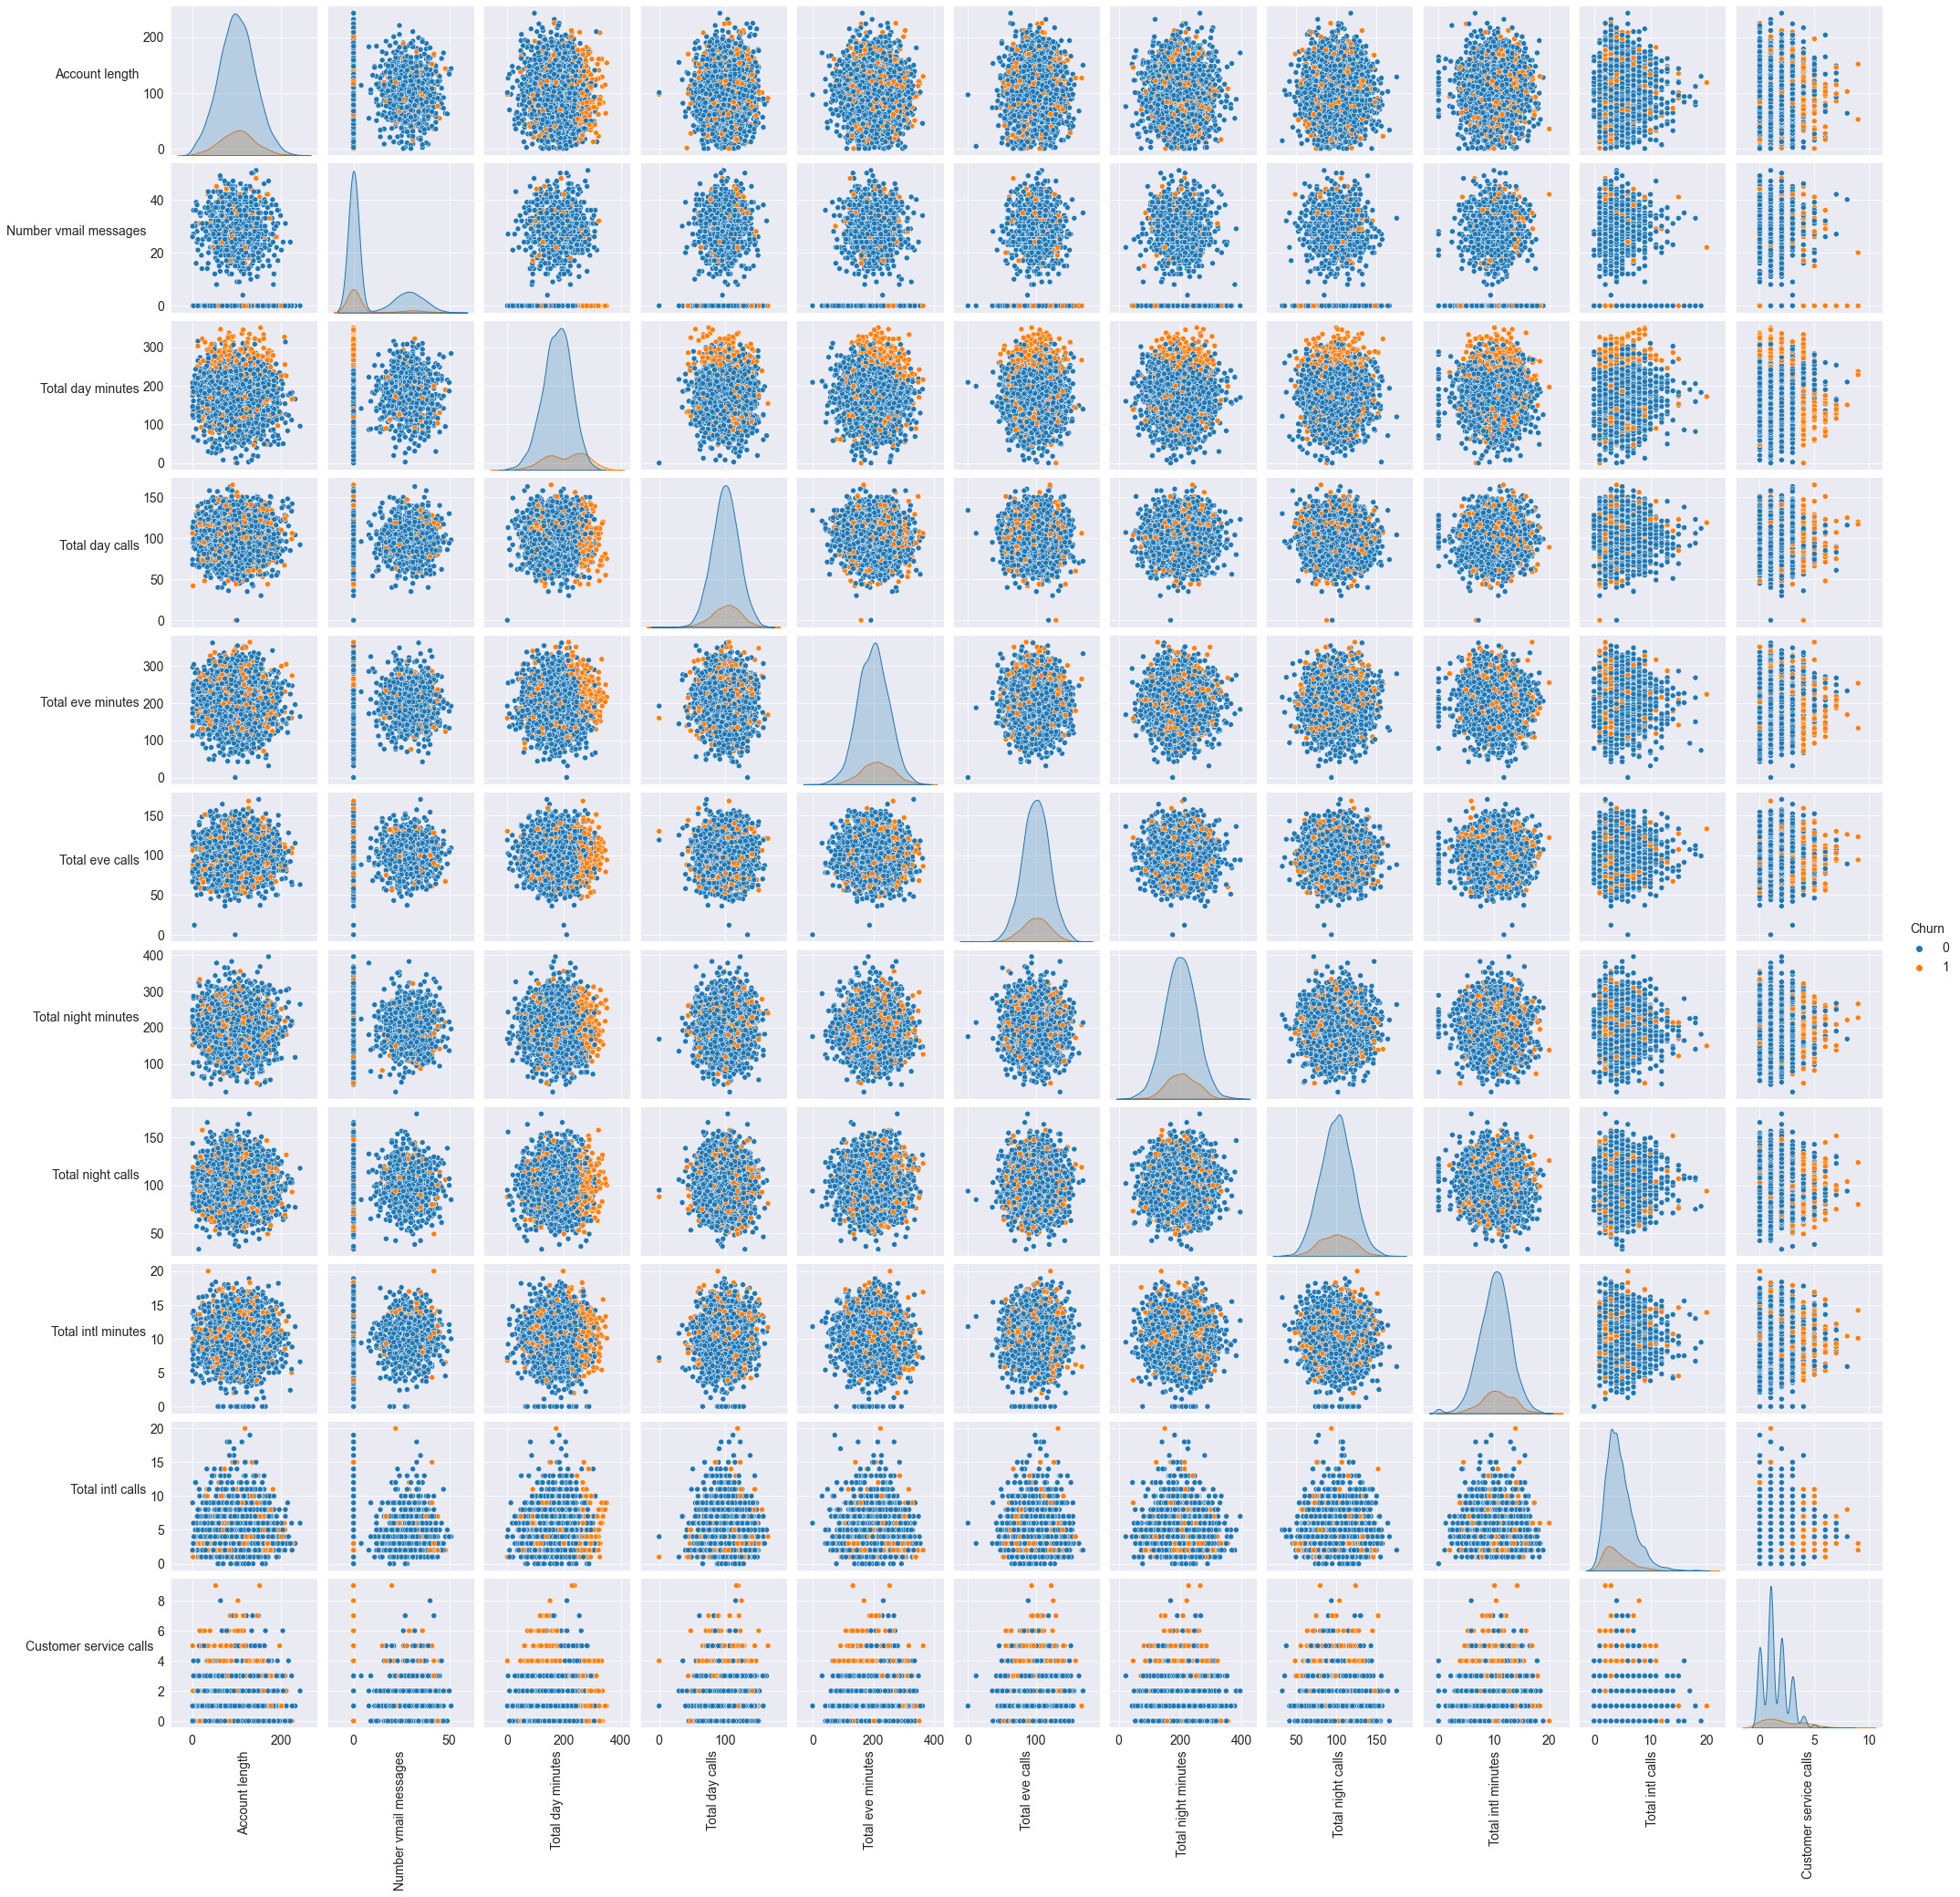

In [58]:
# Target column
target_col = 'Churn'

# Numeric columns
num_cols = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes',
             'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls',
            'Customer service calls']

# All categorical columns
cat_cols = ['State', 'Area code', 'International plan', 'Voice mail plan']

# Make pair plot of numeric data
plt.figure(figsize=(20,20))
g = sns.pairplot(df[num_cols + ['Churn']], hue='Churn')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')


In [59]:
df

Id State  Account length  Area code International plan  \
0        CUST-1    KS             128        415                 No   
1        CUST-2    OH             107        415                 No   
2        CUST-3    NJ             137        415                 No   
3        CUST-4    OH              84        408                Yes   
4        CUST-5    OK              75        415                Yes   
...         ...   ...             ...        ...                ...   
3328  CUST-3329    AZ             192        415                 No   
3329  CUST-3330    WV              68        415                 No   
3330  CUST-3331    RI              28        510                 No   
3331  CUST-3332    CT             184        510                Yes   
3332  CUST-3333    TN              74        415                 No   

     Voice mail plan  Number vmail messages  Total day minutes  \
0                Yes                     25              265.1   
1                Yes                     26              161.6   
2                 No                      0              243.4   
3                 No                      0              299.4   
4                 No                      0              166.7   
...              ...                    ...                ...   
3328             Yes                     36              156.2   
3329              No                      0              231.1   
3330              No                      0              180.8   
3331              No                      0              213.8   
3332             Yes                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0                 110             45.07              197.4               99   
1                 123             27.47              195.5              103   
2                 114             41.38              121.2              110   
3                  71             50.90               61.9               88   
4                 113             28.34              148.3              122   
...               ...               ...                ...              ...   
3328               77             26.55              215.5              126   
3329               57             39.29              153.4               55   
3330              109             30.74              288.8               58   
3331              105             36.35              159.6               84   
3332              113             39.85              265.9               82   

      Total eve charge  Total night minutes  Total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      Total night charge  Total intl minutes  Total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64       

In [60]:
df.drop('Id',axis=1,inplace=True)  ###dropping id column because it is not neccessary

#### Label encoding of ordinal values

In [61]:
df['Voice mail plan']=np.where(df['Voice mail plan']=='Yes',1,0)

In [62]:
df['International plan']=np.where(df['International plan']=='Yes',1,0)

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() ###using label encoder changing the State column to numerical 

In [64]:
df['State']=le.fit_transform(df['State'])

In [65]:
df.head()

State  Account length  Area code  International plan  Voice mail plan  \
0     16             128        415                   0                1   
1     35             107        415                   0                1   
2     31             137        415                   0                0   
3     35              84        408                   1                0   
4     36              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

### X and Y split

In [66]:
X=df.drop('Churn',axis=1)
X

State  Account length  Area code  International plan  Voice mail plan  \
0        16             128        415                   0                1   
1        35             107        415                   0                1   
2        31             137        415                   0                0   
3        35              84        408                   1                0   
4        36              75        415                   1                0   
...     ...             ...        ...                 ...              ...   
3328      3             192        415                   0                1   
3329     49              68        415                   0                0   
3330     39              28        510                   0                0   
3331      6             184        510                   1                0   
3332     42              74        415                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328               

In [67]:
y=df['Churn']
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int32

In [68]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

#### Since this is an imbalanced dataset , i will try to convert it into balanced dataset using resampling techniques  to get accurate results from algorithm

In [69]:
churn=df[df['Churn']==1]
no_churn=df[df['Churn']==0]

In [70]:
print(churn.shape,no_churn.shape)

(483, 20) (2850, 20)


In [71]:
from imblearn.combine import SMOTETomek

In [72]:
###implementing oversampling to handle imbalanced dataset
smk=SMOTETomek(random_state=42)
X_res,Y_res=smk.fit_resample(X,y)

In [73]:
print(X_res.shape,Y_res.shape)

(5686, 19) (5686,)


In [74]:
X_res

State  Account length  Area code  International plan  Voice mail plan  \
0        16             128        415                   0                1   
1        35             107        415                   0                1   
2        31             137        415                   0                0   
3        35              84        408                   1                0   
4        36              75        415                   1                0   
...     ...             ...        ...                 ...              ...   
5681     34             108        415                   0                0   
5682     31              54        415                   0                0   
5683     46             161        415                   0                0   
5684     10              99        408                   0                0   
5685     36              37        510                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25         265.100000              110   
1                        26         161.600000              123   
2                         0         243.400000              114   
3                         0         299.400000               71   
4                         0         166.700000              113   
...                     ...                ...              ...   
5681                      0         158.257021              123   
5682                      0         283.012355               73   
5683                      0         166.429608              124   
5684                      0         135.502103              106   
5685                      0         172.188996              118   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0            45.070000         197.400000               99         16.780000   
1            27.470000         195.500000              103         16.620000   
2            41.380000         121.200000              110         10.300000   
3            50.900000          61.900000               88          5.260000   
4            28.340000         148.300000              122         12.610000   
...                ...                ...              ...               ...   
5681         26.900299         117.931387               93         10.028365   
5682         48.110875         223.638777              102         19.008716   
5683         28.289942         176.399660              105         14.993414   
5684         23.036193         206.297347              101         17.531893   
5685         29.270018         173.756948               94         14.773452   

      Total night minutes  Total night calls  Total night charge  \
0              244.700000                 91           11.010000   
1              254.400000                103           11.450000   
2              162.600000                104            7.320000   
3              196.900000                 89            8.860000   
4              186.900000                121            8.410000   
...                   ...                ...                 ...   
5681           240.142903                 77           10.807421   
5682           197.118350                106            8.873180   
5683           215.625737                 65            9.701396   
5684           211.646869                 97            9.519563   
5685           232.310221                103           10.456627   

      Total intl minutes  Total intl calls  Total intl charge  \
0              10.000000                 3           2.700000   
1              13.700000                 3           3.700000   
2              12.200000                 5           3.290000   
3               6.600000                 7           1.780000   
4              10.100000                 3           2.730000   
...                  ...               ...                ...   
5681           14.1

In [75]:
Y_res

0       0
1       0
2       0
3       0
4       0
       ..
5681    1
5682    1
5683    1
5684    1
5685    1
Name: Churn, Length: 5686, dtype: int32

### Train and test split

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=0)

In [77]:
print(X_train.shape)
print(X_test.shape)


(4548, 19)
(1138, 19)


### Model Building

In [78]:
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

### Logistic regression model F1 score=0.72

In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [138]:
from sklearn.metrics import f1_score, classification_report, make_scorer,confusion_matrix,accuracy_score,roc_auc_score

In [81]:
# Hyper Parameter Tuning
parameters = {
     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'penalty' : ['l1','l2'],
     'C' : np.logspace(-3,3,7)
        }


In [82]:
# Define grid search
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(lr, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Train grid search
gs.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver newton-cg supports only 'l2' or '

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1', verbose=1)

In [83]:
# Predict on test data
lr_model = gs.best_estimator_
lr_train_score = round(f1_score(y_train, lr_model.predict(X_train)), 2)
lr_test_score = round(f1_score(y_test, lr_model.predict(X_test)), 2)
print('F1 Score Train:' , lr_train_score) 
print('F1 Score Test:' , lr_test_score)
print(classification_report(y_test, lr_model.predict(X_test)))

F1 Score Train: 0.76
F1 Score Test: 0.73
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       566
           1       0.73      0.74      0.73       572

    accuracy                           0.73      1138
   macro avg       0.73      0.73      0.73      1138
weighted avg       0.73      0.73      0.73      1138



In [84]:
gs.best_estimator_

LogisticRegression(C=10.0, solver='newton-cg')

In [85]:
lr=LogisticRegression(C=10.0, solver='newton-cg')
lr.fit(X_train,y_train)

LogisticRegression(C=10.0, solver='newton-cg')

In [86]:
y_pred=lr.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.7293497363796133


### Decision Tree model

### Model F1 score:- 0.85

In [87]:
# Hyper Parameter Tuning
parameters = {
     'criterion' : ['gini', 'entropy'],
     'max_depth' : [2,4,6,8,10,12],
     'min_samples_leaf': range(1,5)
        }


In [88]:
tree=DecisionTreeClassifier()

In [89]:
##define grid search
gs = GridSearchCV(tree, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)
# Train grid search
gs.fit(X_train, y_train)
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
F1 Score Cross Validation: 0.87


In [90]:
# Refit and Predict on test data
dt_model = gs.best_estimator_
dt_train_score = round(f1_score(y_train, dt_model.predict(X_train)), 2)
dt_test_score = round(f1_score(y_test, dt_model.predict(X_test)), 2)
print('F1 Score Train:' , dt_train_score) 
print('F1 Score Test:' , dt_test_score)
print(classification_report(y_test, dt_model.predict(X_test)))


F1 Score Train: 0.95
F1 Score Test: 0.85
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       566
           1       0.86      0.83      0.85       572

    accuracy                           0.85      1138
   macro avg       0.85      0.85      0.85      1138
weighted avg       0.85      0.85      0.85      1138



### Random Forest

### Model F1 score:- 0.91

In [91]:
# Hyper Parameter Tuning
parameters = {
     'criterion' : ['gini', 'entropy'],
     'max_depth' : [2,4,6,8,10,12],
     'min_samples_leaf': range(1,5)
        }


In [92]:
rf=RandomForestClassifier()

In [93]:
#define the grid search
gs = GridSearchCV(rf, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Train grid search
gs.fit(X_train, y_train)
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))


# Refit and Predict on test data
rf_model = gs.best_estimator_
rf_train_score = round(f1_score(y_train, rf_model.predict(X_train)), 2)
rf_test_score = round(f1_score(y_test, rf_model.predict(X_test)), 2)
print('F1 Score Train:' , rf_train_score) 
print('F1 Score Test:' , rf_test_score)
print(classification_report(y_test, rf_model.predict(X_test)))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
F1 Score Cross Validation: 0.92
F1 Score Train: 0.97
F1 Score Test: 0.91
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       566
           1       0.96      0.86      0.91       572

    accuracy                           0.91      1138
   macro avg       0.91      0.91      0.91      1138
weighted avg       0.91      0.91      0.91      1138



In [137]:
y_pred=rf_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9103690685413005
[[543  23]
 [ 79 493]]


In [139]:
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9992053864318524
RF test roc-auc: 0.971376238602387


#### Further splitting X_res and Y_res for small cross validation set for hyperparameter tuning because it is taking huge time for tuning with large dataset

In [94]:
y_pred=sc_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))X1,Xcv,y1,ycv=train_test_split(X_train,y_train,test_size=0.10,random_state=11)

In [95]:
print(Xcv.shape)
print(ycv.shape)

(455, 19)
(455,)


### XGBoost Classifier

### Model F1 score:- 0.85

In [96]:
xgb=XGBClassifier()

In [97]:

# Hyper Parameter Tuning
parameters = {
        'n_estimators': [50, 100],    
        'min_child_weight': [0.1, 1, 10],
        'gamma': [0.5, 1, 2],
        'max_depth': [3, 6, 8, 12]
}

# Define grid search
gs = GridSearchCV(xgb, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Train grid search
gs.fit(Xcv, ycv)
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))


# Refit and Predict on test data
xgb_model = gs.best_estimator_
xgb_train_score = round(f1_score(y_train, xgb_model.predict(X_train)), 2)
xgb_test_score = round(f1_score(y_test, xgb_model.predict(X_test)), 2)
print('F1 Score Train:' , xgb_train_score) 
print('F1 Score Test:' , xgb_test_score)
print(classification_report(y_test, xgb_model.predict(X_test)))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score Cross Validation: 0.85
F1 Score Train: 0.87
F1 Score Test: 0.85
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       566
           1       0.88      0.82      0.85       572

    accuracy                           0.85      1138
   macro avg       0.85      0.85      0.85      1138
weighted avg       0.85      0.85      0.85      1138



In [136]:
y_pred=xgb_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8532513181019332
[[500  66]
 [101 471]]


### Adaboost Classifier

### Model F1 score:- 0.84

In [98]:
DTC = DecisionTreeClassifier(random_state = 42)
ada=AdaBoostClassifier(base_estimator=DTC)

# Hyper Parameter Tuning
parameters = {
        'base_estimator__max_depth': [2, 4, 6, 8, 10,12],
        'base_estimator__min_samples_leaf':range(1,5),
        'n_estimators':[50,100,500],
        'learning_rate':[0.01,0.1]
}

# Define grid search
gs = GridSearchCV(ada, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Train grid search
gs.fit(Xcv, ycv)
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))




Fitting 5 folds for each of 144 candidates, totalling 720 fits
F1 Score Cross Validation: 0.86


In [99]:
# Refit and Predict on test data
adab_model = gs.best_estimator_
adab_train_score = round(f1_score(y_train, adab_model.predict(X_train)), 2)
adab_test_score = round(f1_score(y_test, adab_model.predict(X_test)), 2)
print('F1 Score Train:' , adab_train_score) 
print('F1 Score Test:' , adab_test_score)
print(classification_report(y_test, adab_model.predict(X_test)))


F1 Score Train: 0.87
F1 Score Test: 0.84
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       566
           1       0.86      0.82      0.84       572

    accuracy                           0.84      1138
   macro avg       0.84      0.84      0.84      1138
weighted avg       0.84      0.84      0.84      1138



In [135]:
y_pred=adab_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.8391915641476274
[[488  78]
 [105 467]]


### Model performance analysis:- Tree based models out perform all other models.


### Model Ensemble - Voting Classifiers

### MOdel F1 score:-0.92

Model ensemble through voting classifiers. Based on model performance results we ensemble the following 4 models:

1. DecisionTrees
2. RandomForest
3. XGboost
4. Adaboost

In [100]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate


In [101]:
# Define estimator
estimators =  [
                ('dt', dt_model), ('rf', rf_model),
                ('xgb', xgb_model), ('ada', adab_model)
            ]
# Vote
vc = VotingClassifier(estimators=estimators)

# Fit Training Data
vc_scores = cross_val_score(vc, X_train, y_train, cv=5, scoring='f1').mean()
print('F1 Score Cross Validation:' , round(vc_scores, 2))

# Refit and Predict on test data
vc_model = vc.fit(X_train, y_train)
vc_train_score = round(f1_score(y_train, vc_model.predict(X_train)), 2)
vc_test_score = round(f1_score(y_test, vc_model.predict(X_test)), 2)
print('F1 Score Train:' , vc_train_score) 
print('F1 Score Test:' , vc_test_score)
print(classification_report(y_test, vc_model.predict(X_test)))

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score Cross Validation: 0.92


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score Train: 0.99
F1 Score Test: 0.92
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       566
           1       0.98      0.86      0.92       572

    accuracy                           0.92      1138
   macro avg       0.93      0.92      0.92      1138
weighted avg       0.93      0.92      0.92      1138



In [134]:
y_pred=vc_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9217926186291739
[[557   9]
 [ 80 492]]


### Model Ensemble - Stacking Classifier


#### Model ensemble through stacking classifiers. We will use the same 4 models as above



### Model F1 score:-0.93

In [102]:
import warnings
warnings.filterwarnings('ignore')

# Define estimator
estimators =  [
                ('dt', dt_model), ('rf', rf_model),
                ('xgb', xgb_model), ('ada', adab_model)
            ]

# Final Stacking
sc = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())

# Fit Training Data
sc_scores = cross_val_score(sc, X_train, y_train, cv=5, scoring='f1').mean()
print('F1 Score Cross Validation:' , round(sc_scores, 2))

# Refit and Predict on test data
sc_model = sc.fit(X_train, y_train)
sc_train_score = round(f1_score(y_train, sc_model.predict(X_train)), 2)
sc_test_score = round(f1_score(y_test, sc_model.predict(X_test)), 2)
print('F1 Score Train:' , sc_train_score)
print('F1 Score Test:' , sc_test_score)
print(classification_report(y_test, sc_model.predict(X_test)))


[10:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score Cross Validation: 0.94
[10:11:46] WARNING: C:/Users/Administr

In [115]:
y_pred=sc_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9349736379613357
[[542  24]
 [ 50 522]]


In [141]:
ytrain_pred = sc_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = sc_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9757406904050013


### Performance metrics comparision:-

1. According to confusion matrix of all classifiers, Stacking classifier confusion matrix is giving less and balanced false positive and false negative .
2. It will be a the telecom companys loss if a customer is about to churn and they cant predict it.So in this use case false negative is very important.
3. So we should  focus on the F1 score and recall value performance metrics of all algorithms
4. Roc_auc_score is also important in case of imbalanced dataset.Here i have evaluated the roc_auc_score of random forresct classifier and stacking classifier because they were giving best results according to conffusion matrix and classification report
5. When AUC is equal to 1, the classifier is able to perfectly distinguish between all Positive and Negative class points. When AUC is equal to 0, the classifier would be predicting all Negatives as Positives and vice versa. When AUC is 0.5, the classifier is not able to distinguish between the Positive and Negative classes.
5. So i will use Stacking classifier as the algorithm for prediction

## Observations:-
1. The most effective or important features are Total charge , international plan , customer service calls
2. The higher the Total_charge the more likely a customer will churn and vice versa.
3. However, there are some customers who tend to churn less even though they have medium to high Total_charge 
4. More Customer service calls generally an indication of customer churning
5. Customer with an No International plan tend to churn less




### Now creating a system for prediction of churn or no churn if the all the required data provided to the algorithm

In [116]:
import pickle as pkl

In [117]:
file=open('churn.pkl','wb')###creating a pickle file

In [118]:
pkl.dump(sc_model,file) ## dumping all the training of the model

In [119]:
df.head(1)

State  Account length  Area code  International plan  Voice mail plan  \
0     16             128        415                   0                1   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3                2.7   

   Customer service calls  Churn  
0                       1      0

In [121]:
State=16
Account_length=128
Area_code=415
International_plan=0
Voice_mail_plan=1
Number_vmail_messages=25
Total_day_minutes=265.1
Total_day_calls=110
Total_day_charge=45.07
Total_eve_minutes=197.4
Total_eve_calls=99
Total_eve_charge=16.78
Total_night_minutes=244.7
Total_night_calls=91
Total_night_charge=11.01
Total_intl_minutes=10.0
Total_intl_calls=3
Total_intl_charge =2.7
Customer_service_calls=1

In [122]:
x=np.array([[State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls]])

In [123]:
x

array([[ 16.  , 128.  , 415.  ,   0.  ,   1.  ,  25.  , 265.1 , 110.  ,
         45.07, 197.4 ,  99.  ,  16.78, 244.7 ,  91.  ,  11.01,  10.  ,
          3.  ,   2.7 ,   1.  ]])

In [124]:
sc=pkl.load(open('churn.pkl','rb'))

In [125]:
sc.predict(x) 

array([0])

#### Prediction= No churn & Actual result=No churn

In [129]:
df.sample(5)

State  Account length  Area code  International plan  Voice mail plan  \
742       9             116        415                   0                1   
688      23              13        510                   0                1   
324      45             129        408                   0                0   
3166      2              54        415                   0                0   
556      31             123        408                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
742                      17              193.4              112   
688                      21              315.6              105   
324                       0              207.0               91   
3166                      0              247.5               85   
556                       0              159.5               77   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
742              32.88              240.6              131             20.45   
688              53.65              208.9               71             17.76   
324              35.19              154.9              121             13.17   
3166             42.08              225.4               93             19.16   
556              27.12              303.8               92             25.82   

      Total night minutes  Total night calls  Total night charge  \
742                 248.1                 98               11.16   
688                 260.1                123               11.70   
324                 245.1                112               11.03   
3166                244.3                132               10.99   
556                 226.9                120               10.21   

      Total intl minutes  Total intl calls  Total intl charge  \
742                 11.4                 3               3.08   
688                 12.1                 3               3.27   
324                 13.4                 5               3.62   
3166                10.2                 2               2.75   
556                 12.0                 4               3.24   

      Customer service calls  Churn  
742                        5      0  
688                        3      0  
324                        3      0  
3166                       2      1  
556                        0      0

In [132]:
x=np.array([[2,54,415,0,0,0,247.5,85,42.08,225.4,93,19.16,244.3,132,10.99,10.2,2,2.75,2]])

In [133]:
sc_model.predict(x)

array([1])

#### Prediction= churn & Actual result=churn

#### Correct prediction by the algorithm i:e no churn for the data of the customer provided to the algorithm